In [2]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval
from collections import defaultdict


In [4]:
df = pd.read_csv('../dataset/train/train.csv')
df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


데이터 셋은 6개의 columns으로 구성되어 있다.   
  
id, sentence, subject_entity, object_entity, label, source

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


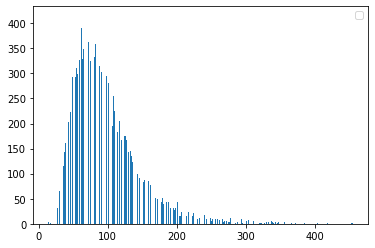

In [18]:
## 각 sentence별 길이 분포
sentence_length = [len(data) for data in df['sentence']]
plt.hist(sentence_length, bins=1000)
plt.legend()
plt.show()

In [19]:
# 길이 400 이상의 데이터 살펴보기
sentence_length_400 = [(idx, data) for idx, data in enumerate(df['sentence']) if len(data) > 400]
print(sentence_length_400)

[(1600, '그 뒤, 1995년 태평양 재활군 투수코치로 본격적인 코치생활을 시작하여 1996년부터 현대 유니콘스의 2군 투수코치를 맡았으며 그 당시 현대 유니콘스의 코치를 맡고 있었던 박종훈과 인연을 맺게 됐는데 1999년 시즌 후 현대에서 재계약을 포기하여 한동안 현장 복귀와 거리가 있었으나 2000년 시즌 후 SK 와이번스 2군 투수코치를 맡으면서 현장에 돌아왔고 팀 분위기 쇄신을 통한 팀 전력 극대화를 위해 2002년 8월 12일부터 1군 투수코치로 보직이 변경됐으며 같은 해 시즌 뒤 조범현 전 삼성 코치가 SK 감독으로 부임하자 2군 투수코치로 돌아왔고 다음 해인 2003년 투수진이 붕괴되자 그 해 8월 14일 김봉근 1군 투수코치와 보직을 맞바꿨으며 2004년 시즌 후 포스트시즌 실패에 따른 문책성 해고에 맞춰 SK와의 계약이 해지되어 롯데 자이언츠 2군 투수코치로 자리를 옮겼다.'), (3274, '1984년 6월 17일 삼성-해태의 경기를 통해 처음 KBO 리그 경기가 열렸으며 이후 같은 해 9월 22일부터 9월 23일까지 해태-OB 2연전이 치러지기도 했고 그 이후 해태 타이거즈가 1985년에 1월 24일부터 같은 달 31일, 1991년에 2월 19일부터 3월 5일, 삼미 슈퍼스타즈가 1985년에 2월 2일부터 같은 달 18일까지, 청보 핀토스가 1986년부터 1987년 , OB 베어스가 1987년에 1월 13일부터 2월 10일, 1988년(1차), 1989년 (2차), 1990년 (1차), MBC 청룡이 1988년 (1차), 삼성 라이온즈가 1991년, 쌍방울 레이더스가 1998년, 한화 이글스가 2003년, 우리 히어로즈가 2008년 이 곳에서 전지훈련을 했으며 태평양 돌핀스가 1989년 전술훈련을 치뤘다.'), (10505, '신장은 178cm이고 체중은 100kg인 그는 1960년 연극배우 첫 데뷔하였으며 이후 1966년 2월 건국대학교 정치외교학과 학사 학위 후 같은 해 1966년 3월에 학군사관으로 육군 소위 임관한 그는 1968

In [6]:
# 문장 길이 분석
data_length = [len(t) for t in df['sentence']]

print("문장 최대 길이 : {}". format(np.max(data_length)))
print("문장 최소 길이 : {}". format(np.min(data_length)))
print("문장 최소 길이 : {:.2f}". format(np.mean(data_length)))

문장 최대 길이 : 455
문장 최소 길이 : 14
문장 최소 길이 : 97.08


In [7]:
print(literal_eval(df['subject_entity'].values[0]))
print(type(literal_eval(df['subject_entity'].values[0])))

{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
<class 'dict'>


## 데이터 분석(Data Analysis)

    - subject entity 분포

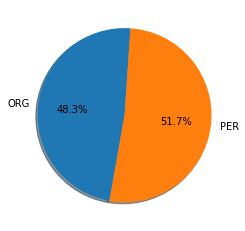

In [8]:
subject_entity_counter = defaultdict(int)
for data in df['subject_entity']:
   subject_entity_counter[literal_eval(data)['type']] += 1
# print(subject_entity_counter)

%matplotlib inline
ratio = [value for value in subject_entity_counter.values()]
labels = [key for key in subject_entity_counter.keys()]
plt.pie(ratio,labels=labels,autopct='%.1f%%', startangle=260, counterclock=False,shadow=True)
plt.show()

    - object entity 분포

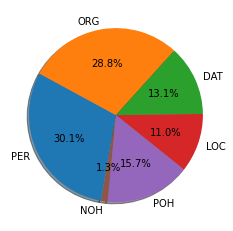

In [9]:
object_entity_counter = defaultdict(int)
for data in df['object_entity']:
   object_entity_counter[literal_eval(data)['type']] += 1
# print(object_entity_counter)

%matplotlib inline
ratio = [value for value in object_entity_counter.values()]
labels = [key for key in object_entity_counter.keys()]
plt.pie(ratio,labels=labels,autopct='%.1f%%', startangle=260, counterclock=False,shadow=True)
plt.show()

    - labels 분포

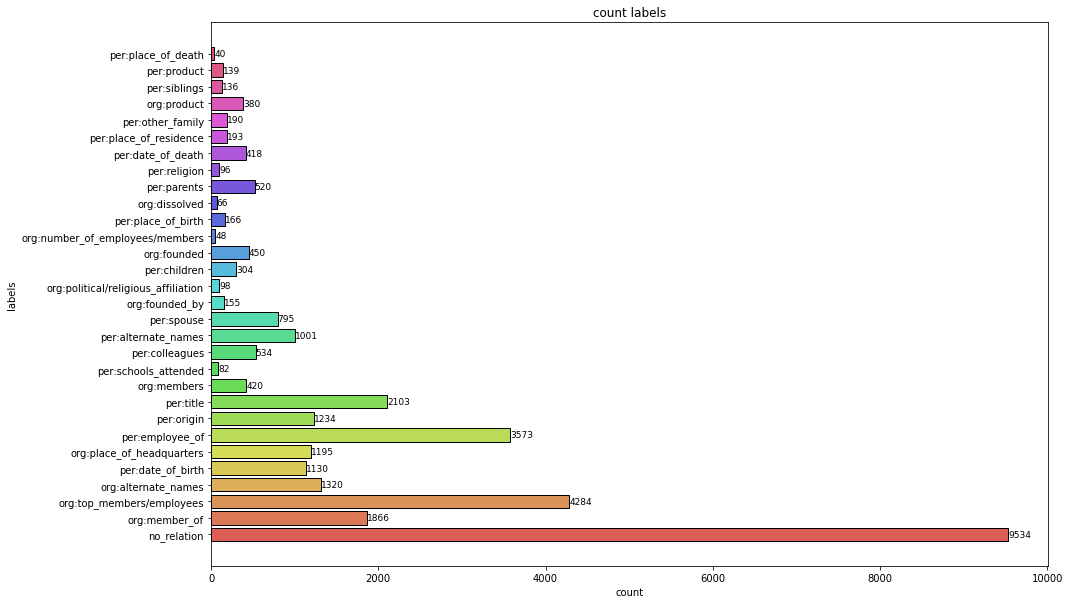

In [22]:
labels_counter = defaultdict(int)
for data in df['label']:
    labels_counter[data] += 1
# print(labels_counter)

%matplotlib inline
y = np.arange(30)
# 데이터
ratio = [value for value in labels_counter.values()]
labels = [key for key in labels_counter.keys()]
colors = sns.color_palette('hls',len(labels)) ## 색상 지정

# 시각화
fig = plt.figure(figsize=(15,10))
plt.barh(labels, ratio, color=colors, edgecolor='black') ## 바 차트 출력
plt.title("count labels")
plt.xlabel('count')
plt.ylabel('labels')

for i, v in enumerate(labels):
    str_val = "%d" % ratio[i]
    plt.text(ratio[i], v, str_val, fontsize=9,horizontalalignment='left',verticalalignment='center')

plt.show()

##### 1) Back Translation (Kor -> Eng -> Kor)
##### 2) Easy Data Augmentation 
- SR (Synonym Replacement): 특정 단어를 비슷한 의미의 유의어로 교체
- RI (Random Insertion) : 임의의 단어를 삽입
- RS (Random Swap) : 텍스트 내의 두 단어를 임의로 선정하여 서로 위치를 바꿔줌
- RD (Random Deletion) : 임의의 단어를 삭제
##### 3) K-Fold

(출처 https://hong-yp-ml-records.tistory.com/)